# Exploración de datos

In [ ]:
#importación de todas las librerías que necesitaremos a lo largo del proceso
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
pd.options.mode.chained_assignment = None  
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,roc_auc_score
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV,KFold, RandomizedSearchCV, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import auc
from numpy import arange
from numpy import argmax
from scipy.stats import randint as randint
from scipy.stats import uniform as uniform 
import lightgbm as lab
from sklearn.metrics import average_precision_score, precision_recall_curve#
from sklearn.neighbors import NearestNeighbors
from scipy.stats import randint as randint
from scipy.stats import uniform as uniform 
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN 
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import RandomOverSampler
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap 
from mlxtend.plotting import plot_decision_regions

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/datasetshopping.csv')
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,0,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,0,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,0,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,0,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,1,0
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,1,0
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,1,0
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,0,0


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.89, 2100, '1908')

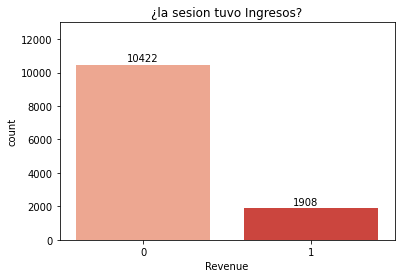

In [ ]:
# gráfico de nuestra variable de salida
revenue_plot = sns.countplot(df['Revenue'],  palette = "Reds").set(title='¿la sesion tuvo Ingresos?')
plt.ylim(0,13000)
plt.text(x=-.100, y=10700 ,s=df['Revenue'].value_counts()[0])
plt.text(x=.890, y=2100, s=df['Revenue'].value_counts()[1])

Del diagrama de conteo anterior, podemos detectar que la mayor parte de la sesión en línea no resultó en una compra del cliente. Específicamente, de las 12330 sesiones en línea, solo 1908 tuvieron éxito en la generación de ingresos, lo que indica un desequilibrio de clase que podría introducir un sesgo hacia la clase mayoritaria cuando se crean nuestros modelos.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

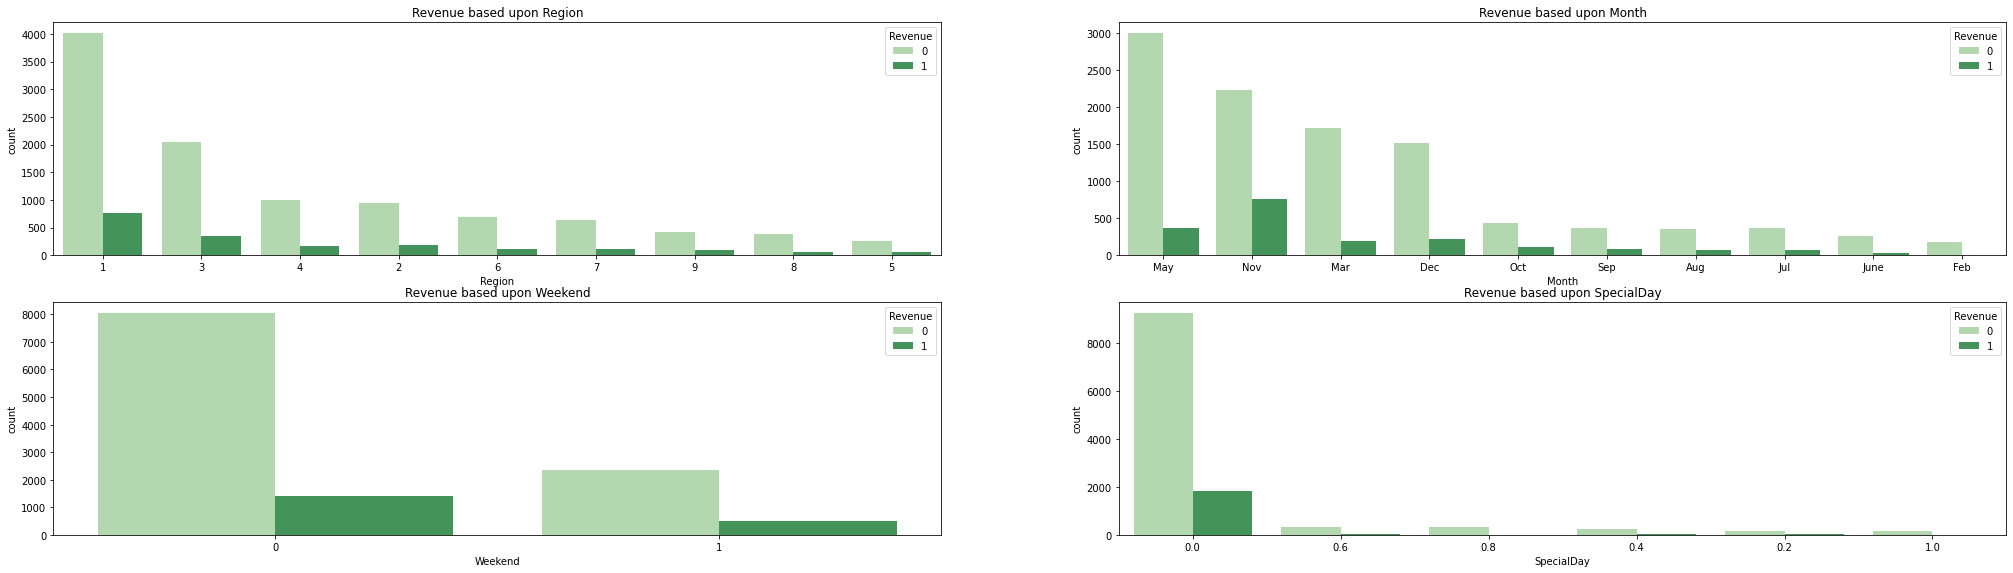

In [ ]:
# calcula las características regionales y relacionadas con el tiempo contra los ingresos
features =['Region','Month','Weekend','SpecialDay']  
plt.figure(figsize=(35,30))
number = 0'''
for feature in features:
    number = number + 1
    ax = plt.subplot(6, 2, number,adjustable='datalim')
    sns.countplot(df[feature],hue=df['Revenue'],
                  order = df[feature].value_counts(ascending=False).index,  palette = "Greens")
    ax.set_title('Revenue based upon'+ " " + feature)
    #plt.tight_layout()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

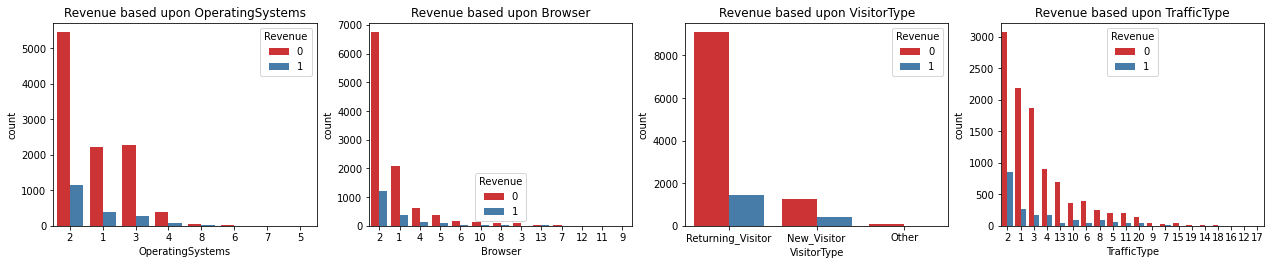

In [ ]:
#cifras sobre cómo los atributos del usuario-sistema afectan los ingresos
features=['OperatingSystems','Browser','VisitorType', 'TrafficType']    
plt.figure(figsize=(50,80))
number = 0
for feature in features:
    number = number + 1
    ax = plt.subplot(18, 9, number,adjustable='datalim')
    sns.countplot(df[feature],hue=df['Revenue'],
                  order = df[feature].value_counts(ascending=False).index,  palette = "Set1")
    ax.set_title('Revenue based upon'+ " " + feature)
    #plt.tight_layout()

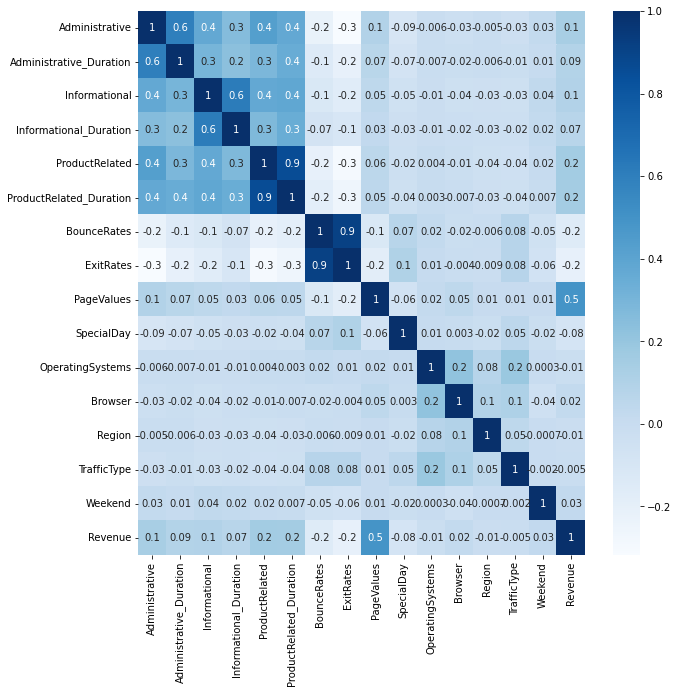

In [ ]:
# correlaciones bivariadas para todas nuestras columnas
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='.1g',cmap='Blues')

Algunos aspectos destacados de los patrones observados en el mapa de calor de correlación a continuación es que los ingresos están muy positivamente correlacionados con la función de número promedio de valores de página (r = 0,5), mientras que están inversamente correlacionados con las tasas de rebote y salida. Además, como era de esperar, de las páginas administrativas, informativas y relacionadas con productos, la que genera mayores ingresos es la cantidad de páginas relacionadas con productos visitadas por el usuario (r = 0,2)..

# Preprocesamiento de datos

Primero, dividiremos el tren del conjunto de prueba para que podamos preprocesarlo.

por separado para evitar la fuga de datos a nuestra muestra de prueba.

In [ ]:
#extraer nuestra variable de resultado
y = df['Revenue']

#drop y de nuestro conjunto de predictores
X = df.drop('Revenue',1)

# codificar vector de columna
le = LabelEncoder()
y = pd.DataFrame(le.fit_transform(y))

#dividir la muestra para entrenar y probar para proceder con el preprocesamiento para ambos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.172,stratify=y, random_state=123, shuffle=True)

<ipython-input-8-c3a11346ca37>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df.drop('Revenue',1)


# funciones numericas:
Entonces lo que se está proponiendo es crear nuevas variables o "funciones" a partir de los datos disponibles, y utilizar umbrales para determinar si una observación se considera como indicadora de ingresos o no. Estas nuevas variables se codificarán como 1 si la observación supera o está por debajo de ciertos umbrales, y como 0 en caso contrario. ¿Tienes alguna pregunta en particular sobre este proceso?

### Indicadores de ingresos potenciales en funciones numéricas:

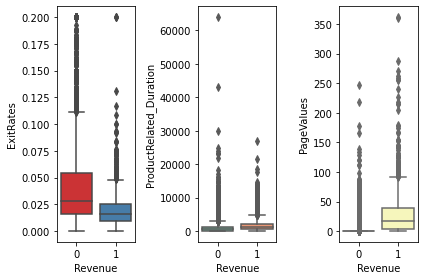

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
#plt.figure(figsize=(10,))

sns.boxplot(x='Revenue', y='ExitRates', data=df, ax=ax1,  palette = "Set1")
sns.boxplot(x='Revenue', y='ProductRelated_Duration', data=df, ax=ax2,  palette = "Set2")
sns.boxplot(x='Revenue', y='PageValues', data=df, ax=ax3,  palette = "Set3")
fig.tight_layout()
fig.subplots_adjust(wspace = 0.8)


. Así que a partir de la exploración de los datos, se han identificado tres factores potenciales que pueden ser indicadores de sesiones con ingresos: tasas de salida por debajo de un cierto umbral, valores positivos en la función de valores de página y tiempos dedicados a páginas relacionadas con productos más altos. Estos factores se utilizarán para crear nuevas variables o "funciones", y luego se establecerán umbrales para determinar si una observación se considera como indicadora de ingresos o no.

In [ ]:
##ingeniería de características 1
#Los valores positivos en los valores de página son mucho más probables en las sesiones de ingresos
def create1(row):
    if row['PageValues']>0:
        value = 1
    else:
        value = 0
    
    return value
X_train['Pageval_rev_indicator'] = X_train.apply(create1, axis=1)
X_test['Pageval_rev_indicator'] = X_test.apply(create1, axis=1)

#Ingeniería de características 2
# Clientes que han pasado mucho tiempo en páginas relacionadas con productos y tienen bajas tasas de salida
# son nuevamente más propensos a ser compradores, por lo que diseñaremos una variable basada en estas características
def create2(row):
    if row['ProductRelated_Duration']>=1000 and row['ExitRates']<=0.015:
        value = 1
    else:
        value = 0
    
    return value
X_train['webdur_rev_indicator'] = X_train.apply(create2, axis=1)
X_test['webdur_rev_indicator'] = X_test.apply(create2, axis=1)

### Indicadores de ingresos potenciales en características categóricas:
Ahora visualizaremos algunas columnas categóricas y su recuento de ingresos para verificar si hay algunos indicadores.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

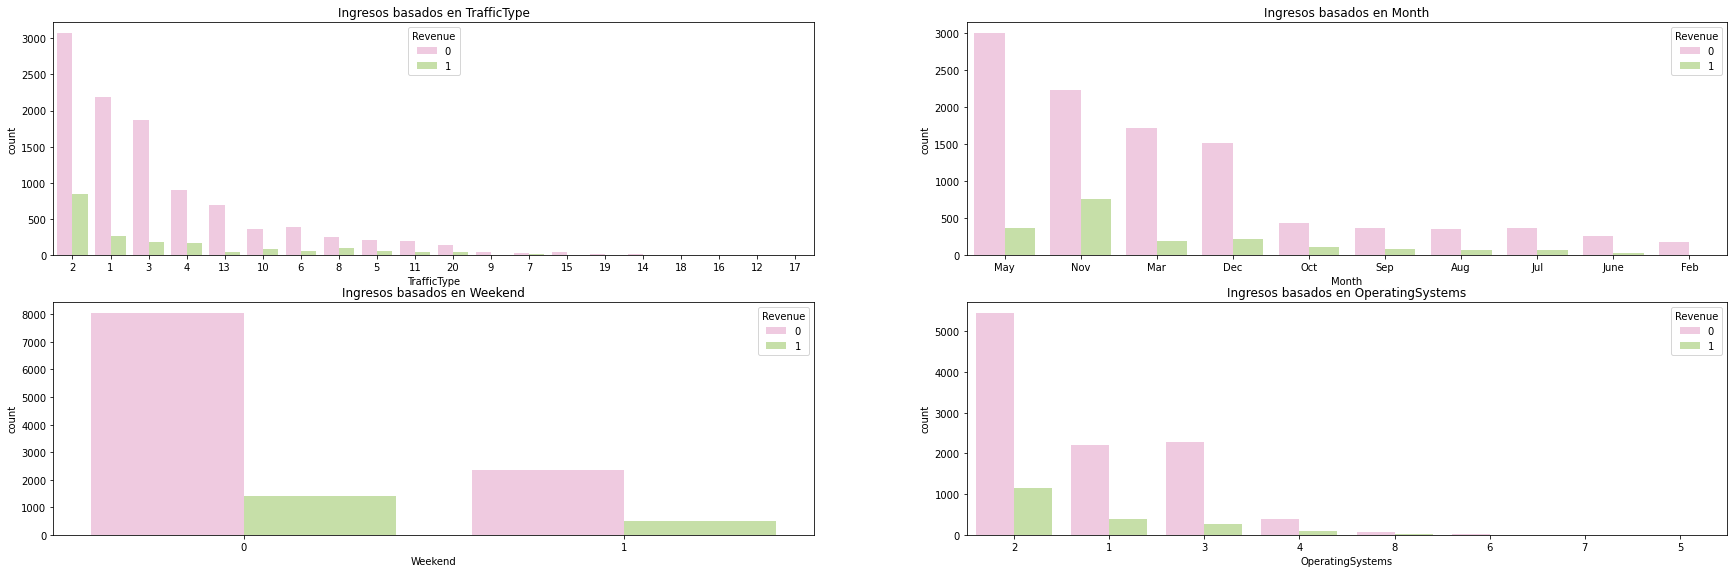

In [ ]:
features =['TrafficType','Month','Weekend','OperatingSystems']    
plt.figure(figsize=(30,30))
number = 0
for feature in features:
    number = number + 1
    ax = plt.subplot(6, 2, number,adjustable='datalim')
    sns.countplot(df[feature],hue=df['Revenue'],
                  order = df[feature].value_counts(ascending=False).index,  palette = "PiYG")
    ax.set_title('Ingresos basados en'+ " " + feature)

Así que, además de los factores mencionados anteriormente, también se ha identificado que las sesiones con sistemas operativos y tráfico de categoría 2 son más propensas a generar ingresos. Además, el mes de noviembre parece ser un período en el que se generan más ingresos, posiblemente debido a ofertas especiales como el viernes negro.

In [ ]:
#ingeniería de funciones 3
#De nuevo, un factor clave potencial para los ingresos podría ser el momento, específicamente los fines de semana o el mes de noviembre (Viernes negro)
def create3(row):
    if row['Month'] == 'Nov' or row['Weekend'] == 'True':
        value = 1
    else:
        value = 0
    return value

X_train['timing_rev_indicator'] = X_train.apply(create3, axis=1)
X_test['timing_rev_indicator'] = X_test.apply(create3, axis=1)

        
#ingeniería de funciones 4
def create4(row):
    if row['OperatingSystems'] == 2  and row['TrafficType'] == 2:
        value = 1
    else:
        value = 0
    
    return value
X_train['systemuser_rev_indicator'] = X_train.apply(create4, axis=1)
X_test['systemuser_rev_indicator'] = X_test.apply(create4, axis=1)

In [ ]:
#funciones que crean un nuevo df con solo las columnas numéricas o categóricas
def find_numeric(dataframe):
    for i in dataframe.columns:
        numerical_feat = dataframe.select_dtypes(include = np.number)                                           
        return numerical_feat                             
def find_categoric(dataframe):
    for i in dataframe.columns:
        categorical_feat = dataframe.select_dtypes(exclude = np.number)
        return categorical_feat
#xtrain
X_train_numeric = find_numeric(X_train)
#soltar columnas que están codificadas como numéricas pero que son de naturaleza categórica a partir de nuestras características numéricas
X_train_numeric.drop(['systemuser_rev_indicator','SpecialDay','webdur_rev_indicator','Pageval_rev_indicator','timing_rev_indicator','OperatingSystems','Browser','Region','TrafficType',],axis=1, inplace=True)

# incorporar los miedos anteriores en el df categórico
X_train_categoric = find_categoric(X_train)
Xtrain_other_categs = X_train[['systemuser_rev_indicator','SpecialDay','webdur_rev_indicator','Pageval_rev_indicator','timing_rev_indicator','OperatingSystems','Browser','Region','TrafficType']]
# incorporar los miedos anteriores en el df categórico
X_train_categoric = pd.concat([X_train_categoric,Xtrain_other_categs] ,axis=1)

# realizar los mismos pasos para xtest
X_test_numeric = find_numeric(X_test)
X_test_numeric.drop(['systemuser_rev_indicator','SpecialDay','webdur_rev_indicator','Pageval_rev_indicator','timing_rev_indicator','OperatingSystems','Browser','Region','TrafficType'],axis=1, inplace=True)
X_test_categoric = find_categoric(X_test)
X_test_other_categs = X_test[['systemuser_rev_indicator','SpecialDay','webdur_rev_indicator','Pageval_rev_indicator','timing_rev_indicator','OperatingSystems','Browser','Region','TrafficType']]
#crea un nuevo df con todas las características categóricas
X_test_categoric = pd.concat([X_test_categoric,X_test_other_categs] ,axis=1)


### Preprocesamiento de columnas numéricas:
Multicolinealidad: Así que en esta fase, se está investigando si hay multicolinealidad entre las variables o "características" utilizadas en el modelo. La multicolinealidad ocurre cuando dos o más variables están altamente correlacionadas entre sí, lo que puede indicar una superposición de sus efectos y una posible pérdida de información para el modelo. Para evaluar si hay multicolinealidad, se utilizará el factor de inflación de la variable (VIF), con puntajes superiores a 5 que se consideran como indicativos de multicolinealidad alta.

In [ ]:
def calc_vif(x):
   # Calculando VIF
    vif = pd.DataFrame()
    vif["variables"] = x.columns
    vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    return(vif)#calc_vif(X_train_numeric)
calc_vif(X_train_numeric)

,variables,VIF
0,Administrative,2.651300
1,Administrative_Duration,2.041228
2,Informational,2.101032
3,Informational_Duration,1.762455
4,ProductRelated,6.319090
5,ProductRelated_Duration,5.984311
6,BounceRates,5.614278
7,ExitRates,6.038931
8,PageValues,1.086176
9,Weekend,1.215625


Así que se ha identificado que las variables "ProductRelated_Duration" y "ProductRelated" son altamente correlacionadas entre sí, lo que significa que hay multicolinealidad entre ellas. Para evitar la pérdida de información, se propone crear una nueva variable o "columna" que se deriva de dividir "ProductRelated_Duration" entre "ProductRelated_Page". Esto se aplicará también a las variables "bounce_rates" y "exit_rates", que también presentan multicolinealidad alta. Además, para compensar la pérdida de información que puede resultar de eliminar una de estas variables, se creará una nueva columna que sea el promedio entre "exit" y "bounce_rates". ¿Es correcto? ¿Hay algo más en lo que pueda ayudarte?

In [ ]:
# soltar una entidad con multicolinealidad
X_train_numeric = X_train_numeric.drop('ProductRelated_Duration',1)

# diseñar una nueva columna para no perder información
X_train_numeric['Duration_per_ProductRelatedPage'] = X_train.ProductRelated_Duration / X_train.ProductRelated
X_train_numeric.Duration_per_ProductRelatedPage.fillna(0,inplace=True)

# apply the same steps for  bouncee and exit rates which were foind collinear too
X_train_numeric['bounce_exit_average'] = (X_train.BounceRates + X_train.ExitRates)/2
X_train_numeric = X_train_numeric.drop('ExitRates',1)
X_train_numeric = X_train_numeric.drop('BounceRates',1)

#check for multicoliearity again

calc_vif(X_train_numeric)

<ipython-input-15-dc12110021d2>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_train_numeric = X_train_numeric.drop('ProductRelated_Duration',1)
<ipython-input-15-dc12110021d2>:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_train_numeric = X_train_numeric.drop('ExitRates',1)
<ipython-input-15-dc12110021d2>:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_train_numeric = X_train_numeric.drop('BounceRates',1)


,variables,VIF
0,Administrative,2.571597
1,Administrative_Duration,1.926330
2,Informational,2.101098
3,Informational_Duration,1.714732
4,ProductRelated,1.851221
5,PageValues,1.100995
6,Weekend,1.202393
7,Duration_per_ProductRelatedPage,1.330632
8,bounce_exit_average,1.105184


Como se ve en el df anterior, ya no hay multicolinealidad entre ninguna de las columnas. Ahora también se aplicarán los mismos remedios para nuestro conjunto de prueba.

In [ ]:
X_test_numeric = X_test_numeric.drop('ProductRelated_Duration',1)
X_test_numeric['ProductRelated_Duration_page'] = X_test.ProductRelated_Duration / X_test.ProductRelated
X_test_numeric.ProductRelated_Duration_page.fillna(0,inplace=True)

#calc_vif(X_test_numeric)
X_test_numeric['bounce_exit_average'] = (X_test.BounceRates + X_test.ExitRates)/2

X_test_numeric = X_test_numeric.drop('ExitRates',1)
X_test_numeric = X_test_numeric.drop('BounceRates',1)

calc_vif(X_test_numeric)


<ipython-input-16-475996056ead>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_test_numeric = X_test_numeric.drop('ProductRelated_Duration',1)
<ipython-input-16-475996056ead>:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_test_numeric = X_test_numeric.drop('ExitRates',1)
<ipython-input-16-475996056ead>:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_test_numeric = X_test_numeric.drop('BounceRates',1)


,variables,VIF
0,Administrative,2.762919
1,Administrative_Duration,1.974994
2,Informational,2.240706
3,Informational_Duration,1.906000
4,ProductRelated,1.835126
5,PageValues,1.089415
6,Weekend,1.178508
7,ProductRelated_Duration_page,1.347106
8,bounce_exit_average,1.095466


### Valores atípicos y distribuciones:
A continuación, comprobaremos los valores atípicos de las columnas numéricas en función de los diagramas de caja.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

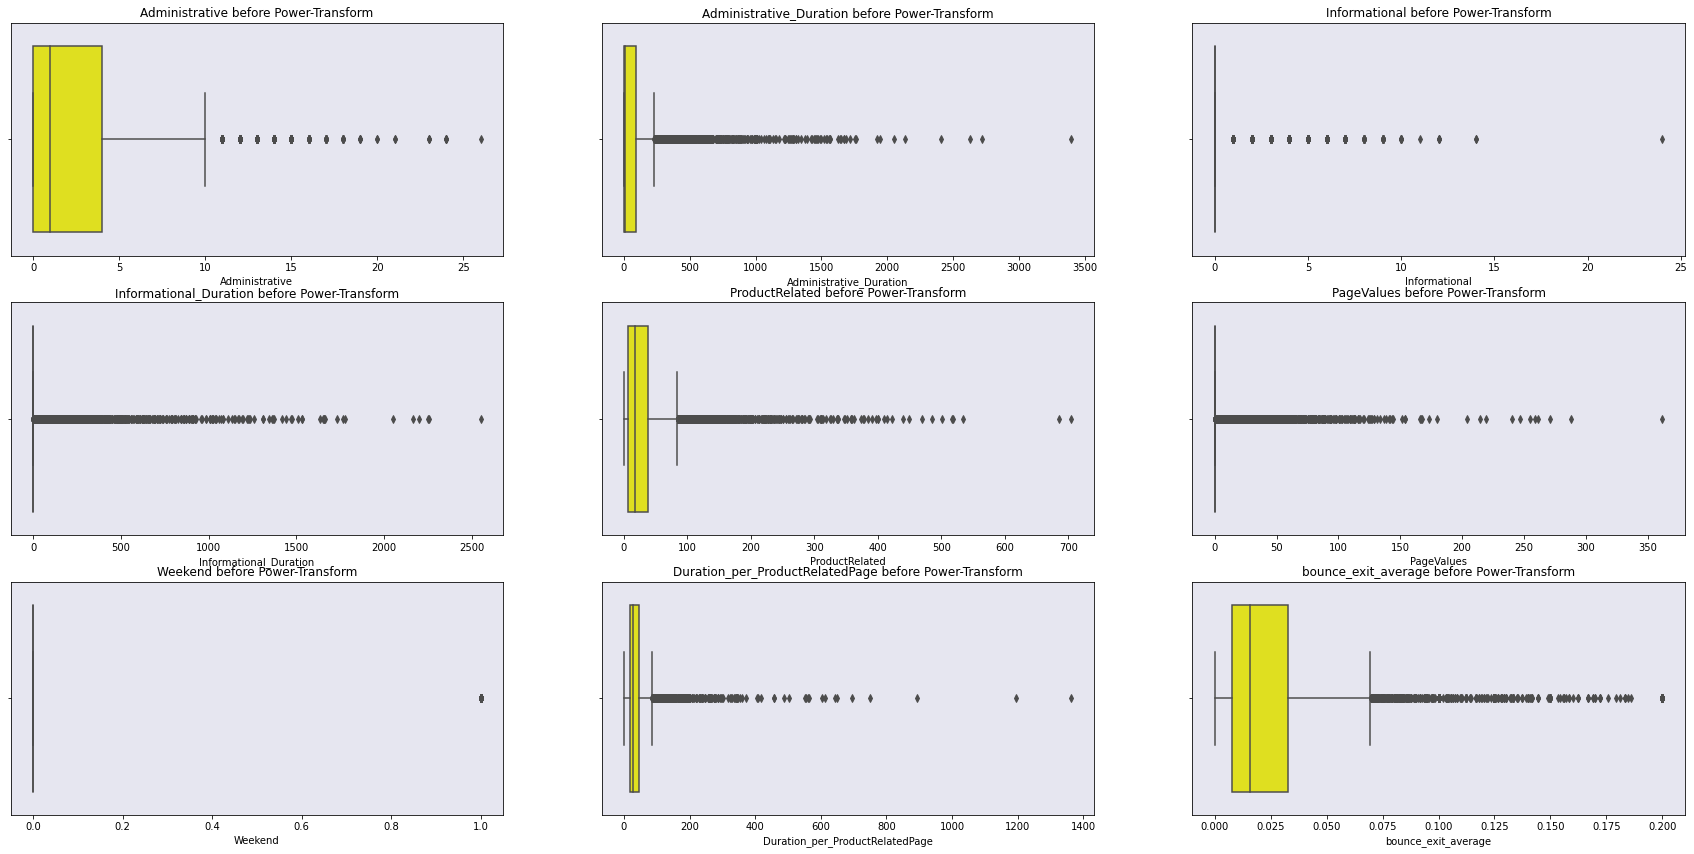

In [ ]:
features = X_train_numeric.columns
plt.figure(figsize=(30,30))
number = 0
for feature in features:
    number = number + 1 
    ax = plt.subplot(6, 3, number,adjustable='datalim')
    ax = sns.boxplot(X_train_numeric[feature], color='Yellow')
    ax.set_facecolor((0.90, 0.90, 0.94))
    ax.set_title(feature + ' ' + 'before Power-Transform')

Ahora visualicemos la distribución de nuestros datos numéricos, lo que nos dará una idea del tipo de escala con el que debemos proceder.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/lo

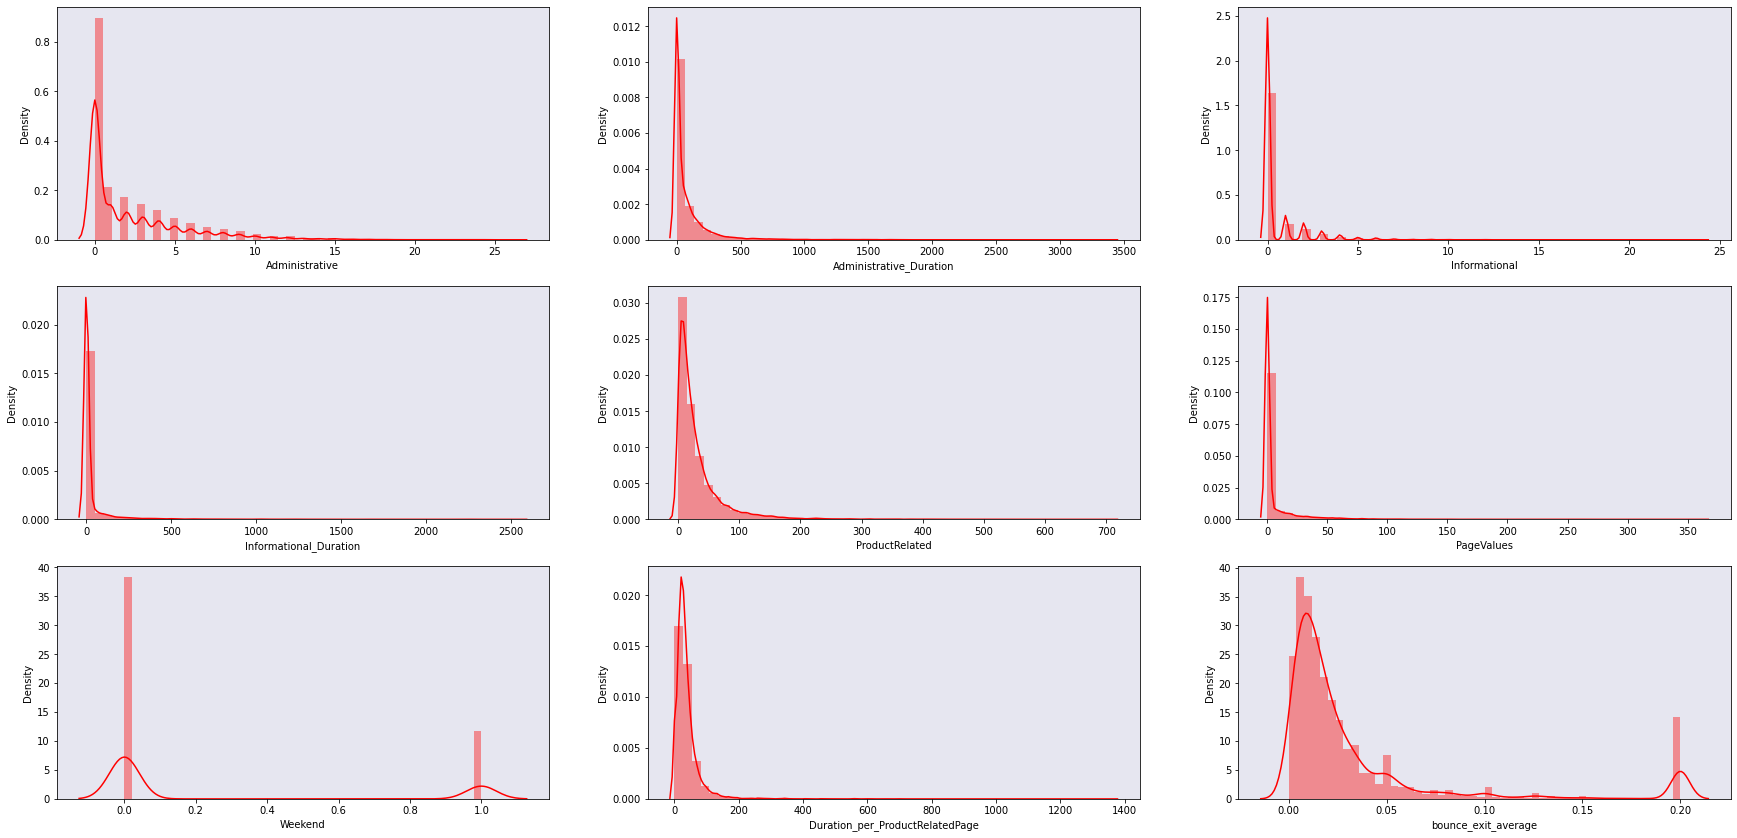

In [ ]:
plt.figure(figsize=(30,30))
number = 0
for feature in features:
    number = number + 1 
    ax = plt.subplot(6, 3, number,adjustable='datalim')
    ax = sns.distplot(X_train_numeric[feature],  kde_kws={'bw':0.1}, color='Red')
    ax.set_facecolor((0.90, 0.90, 0.94))

Como se ve en los histogramas anteriores, la mayoría de las características numéricas sufren de asimetría hacia la derecha. Una forma de corregirlo es aplicar un tipo de transformación que escale los datos a una manera gaussiana que es la transformación de potencia, específicamente la transformación 'Yeo-Johnson'. Además, en lugar de eliminar los valores atípicos, la transformación de prower simplemente disminuirá su impacto de manera que ya no se considerarán valores atípicos. Consideramos esto preferible a eliminarlos, ya que podrían representar información valiosa para nuestros modelos.

## Transformación de datos('Yeo-Johnson'):

In [ ]:
# call power transformer
power=PowerTransformer(standardize=True)

# Power transformation for both our samples
X_train_numeric = pd.DataFrame(power.fit_transform(X_train_numeric),columns=X_train_numeric.columns)
X_test_numeric = pd.DataFrame(power.transform(X_test_numeric),columns=X_test_numeric.columns)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- ProductRelated_Duration_page
Feature names seen at fit time, yet now missing:
- Duration_per_ProductRelatedPage

  warnings.warn(message, FutureWarning)


Ahora visualicemos el cambio en la distribución de características numéricas y qué impacto tuvo la transformación de potencia en los múltiples valores atípicos.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/lo

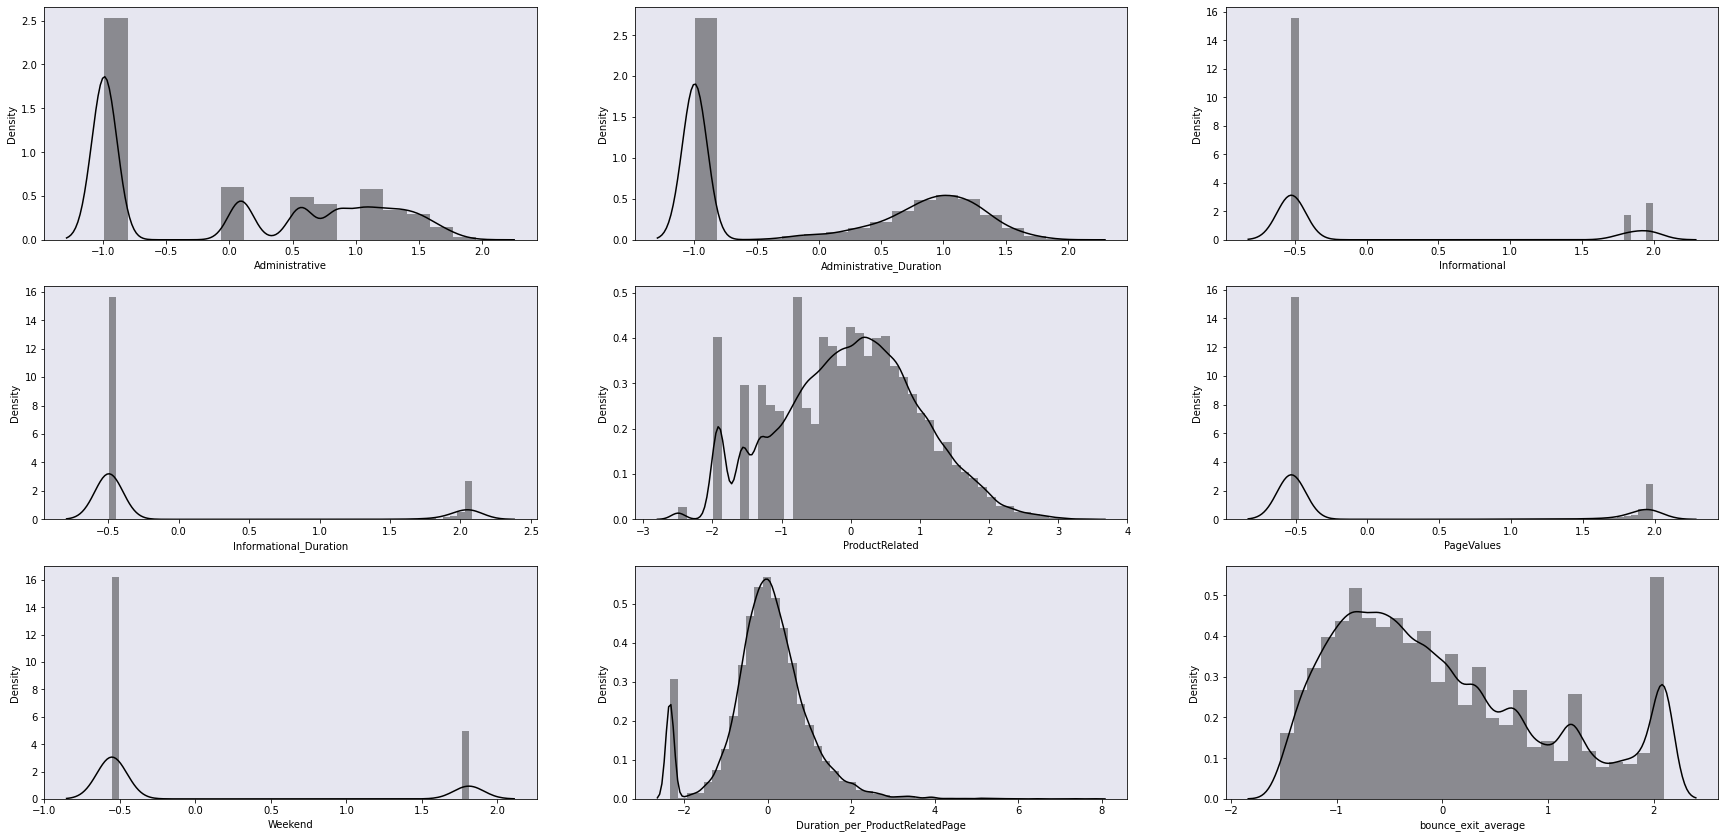

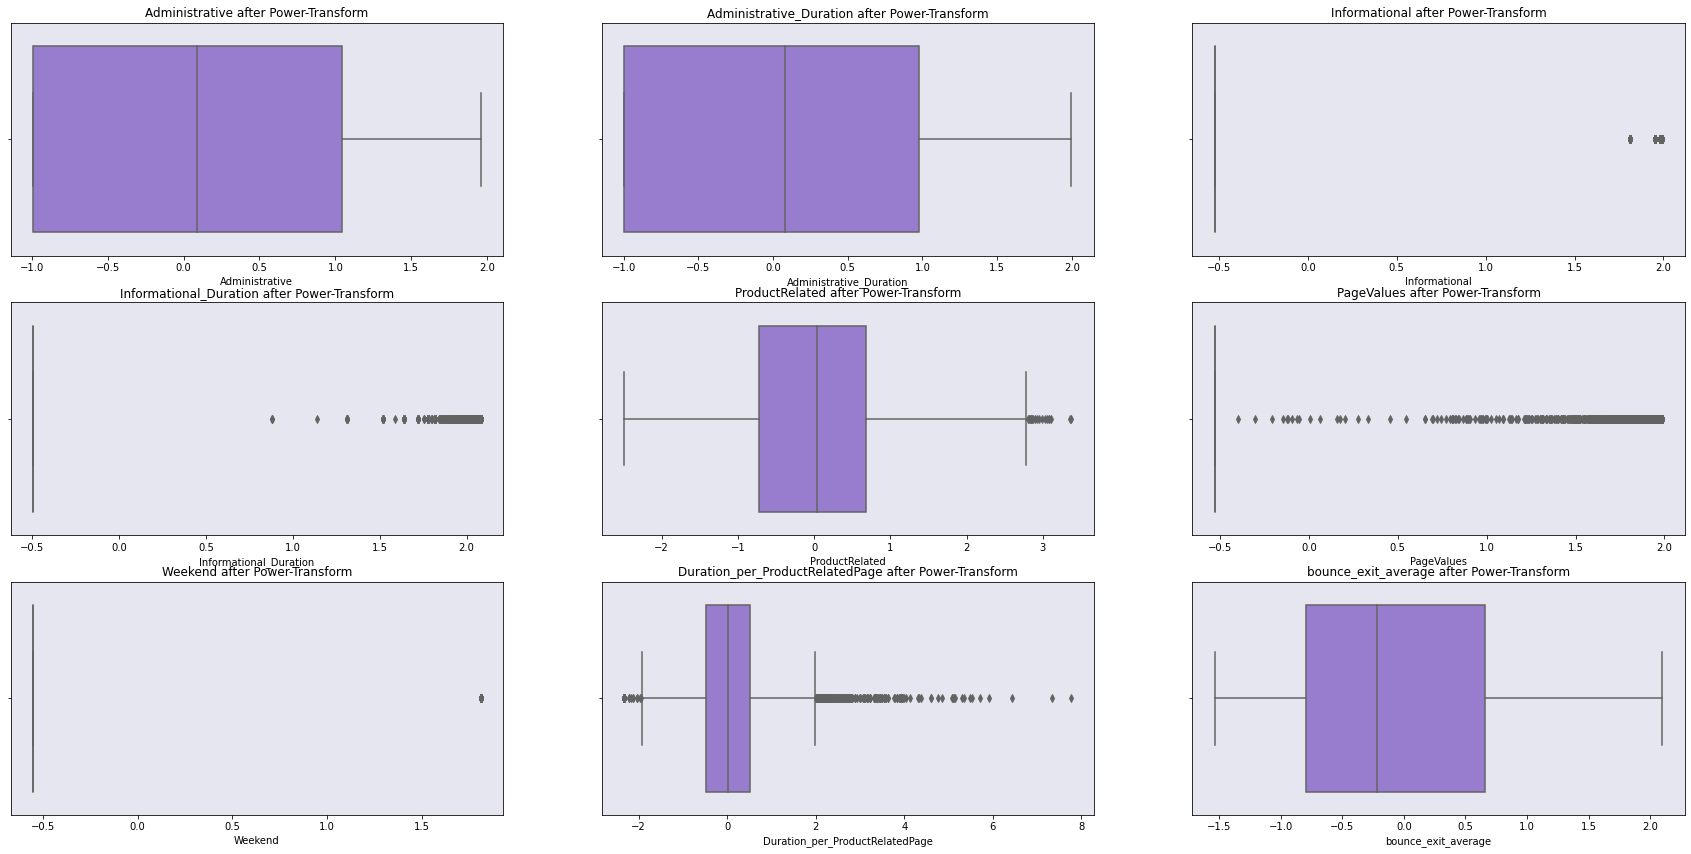

In [ ]:
plt.figure(figsize=(30,30))
number = 0
for feature in features:
    number = number + 1 
    ax = plt.subplot(6, 3, number,adjustable='datalim')
    ax = sns.distplot(X_train_numeric[feature],  kde_kws={'bw':0.1}, color='Black')
    ax.set_facecolor((0.90, 0.90, 0.94))
    
features = X_train_numeric.columns
plt.figure(figsize=(30,30))
number = 0
for feature in features:
    number = number + 1 
    ax = plt.subplot(6, 3, number,adjustable='datalim')
    ax = sns.boxplot(X_train_numeric[feature], color='mediumpurple')
    ax.set_facecolor((0.90, 0.90, 0.94))
    ax.set_title(feature + ' ' + 'after Power-Transform')


Como se ve arriba, la mayoría de las columnas se escalaron a una forma similar a la de Gauss y el impacto de múltiples valores atípicos se redujo hasta el punto de que ya no superan los cuantiles anteriores.

## Codificación categórica:
Con respecto a la codificación de nuestras columnas categóricas, decidimos evitar la codificación de etiquetas, ya que la asignación de diferentes valores a diferentes categorías podría sesgar nuestro modelo para considerar que los valores más altos tienen más impacto que los más bajos. Debido a esto, utilizaremos una codificación en caliente que aborda este problema. Además, eliminamos la primera columna de cada característica categórica para evitar la multicolinealidad.

In [ ]:
#store all categorical column names
categoricals=['Pageval_rev_indicator','systemuser_rev_indicator','webdur_rev_indicator','timing_rev_indicator','Month','OperatingSystems','Browser','Region','TrafficType','VisitorType','Weekend', 'SpecialDay']

X_train =  pd.concat([X_train_categoric.reset_index(drop=True),X_train_numeric.reset_index(drop=True)], axis=1)
X_test =  pd.concat([X_test_categoric.reset_index(drop=True),X_test_numeric.reset_index(drop=True)], axis=1)

X_test=pd.get_dummies(data=X_test,columns=categoricals,drop_first=True)
X_train=pd.get_dummies(data=X_train,columns=categoricals,drop_first=True)

X_train,X_test  = X_train.align(X_test, join='left', axis=1, fill_value=0)


## Reducción de dimensionalidad con PCA:
Así que después de realizar el estudio de características, se ha obtenido un conjunto de datos con 74 características o variables. En este caso, es importante tener en cuenta que trabajar con espacios de alta dimensionalidad puede presentar el riesgo de incluir características ruidosas o poco relevantes para el modelo, lo que podría afectar negativamente las predicciones. Para reducir la dimensionalidad del conjunto de datos y evitar este problema, se propone utilizar el análisis de componentes principales (PCA).

In [ ]:
from sklearn.decomposition import PCA
#iterar sobre diferentes numeros de componentes
for n in [2,5,8,10,15,20,25,30,40]:
    number_features = PCA(n_components=n)
    pca_data = number_features.fit_transform(X_train)
    exp_variance = round(np.sum(number_features.explained_variance_ratio_)*100,2)
    print(n, 'Predictors explain',exp_variance,' % oftotal Variabillity')

2 Predictors explain 43.15  % oftotal Variabillity
5 Predictors explain 65.31  % oftotal Variabillity
8 Predictors explain 76.27  % oftotal Variabillity
10 Predictors explain 80.71  % oftotal Variabillity
15 Predictors explain 87.68  % oftotal Variabillity
20 Predictors explain 91.28  % oftotal Variabillity
25 Predictors explain 93.82  % oftotal Variabillity
30 Predictors explain 95.65  % oftotal Variabillity
40 Predictors explain 98.14  % oftotal Variabillity


El PCA nos muestra que un número entre 10 y 40 componentes podría ser el óptimo en términos de simplicidad y este será el rango que usaremos en nuestra fase de construcción de modelos para optimizar su rendimiento. 40 de 74 características explican más del 98% de la varianza total, lo que significa que tenemos muchas dimensiones ruidosas que no contribuyen.

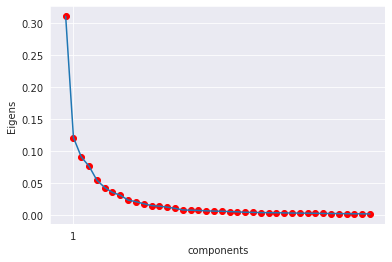

In [ ]:
# grafico de sedimentacion para mostrar valores propios para numero de componentes diferentes
sns.set_style(style='darkgrid')
plt.plot(number_features.explained_variance_ratio_,'o', color = 'Red')
plt.plot(number_features.explained_variance_ratio_)
plt.xticks(range(1,35,40))
plt.xlabel('components')
plt.ylabel('Eigens')
plt.show()

# Construcción del modelo:
Ahora entrenaremos y obtendremos las predicciones de nuestros tres algoritmos. Los consideramos como nuestros primeros modelos básicos y en una próxima fase planeamos construir sobre ellos y evaluar la posible mejora o disminución en el rendimiento.

### Problema:
El desafío más crítico de este conjunto de datos es el desequilibrio de clases. Para superar este problema, planeamos implementar dos enfoques diferentes y comparar su eficiencia. El remedio más común para este problema son las técnicas de remuestreo que ayudan a aumentar el impacto de la etiqueta minoritaria en la función de costo, ya que los algoritmos regulares en general se adaptan a la clase negativa mayoritaria (sin ingresos) y funcionan mal en la clase de interés. (ingresos). Sin embargo, hay algunas desventajas cuando se trata de remuestreo. Para ser específicos, los métodos de submuestreo podrían descartar información útil para el modelo, mientras que el sobremuestreo, que crea copias de nuestros datos, podría conducir a un sobreajuste. Por esta razón, primero planeamos implementar una técnica que a menudo se pasa por alto en el aprendizaje automático como un remedio potencial. Este es el ajuste del umbral de clasificación. Muchos algoritmos predicen las probabilidades de pertenencia a una clase para una observación. Los valores por debajo de este umbral de probabilidad se asignan a una determinada clase, mientras que los valores superiores se asignan a la clase opuesta. Sin embargo, en el desequilibrio de clases, el umbral predeterminado, que suele ser 0,5, genera predicciones deficientes. El ajuste de este umbral es algo que a menudo se ignora en los problemas de desequilibrio de clases (Provost, 2000) y ese es nuestro primer paso para superar el sesgo causado por el desequilibrio.


### Objetivo/Métricas:
Comenzando, se debe señalar que la precisión no es una métrica confiable en el desequilibrio de clases, ya que el impacto de la clase mayoritaria de no ingresos dará como resultado un alto nivel de precisión, incluso si la clase minoritaria de interés no se identifica en absoluto (Paradoja de la precisión ). Por lo tanto, la propiedad deseada de nuestros algoritmos una vez finalizados es su capacidad para identificar verdaderos positivos porque el costo de perder a un comprador es más alto que el costo de clasificar erróneamente a un no comprador como comprador (incluido un falso positivo), lo que significa que el recuerdo es más crucial. que la precisión. Por esta razón, deseamos crear y optimizar una métrica personalizada que tenga en cuenta tanto la precisión como la recuperación, pero que sopese la recuperación un poco más que la precisión, que es el promedio armónico ponderado entre las dos medidas (Fbeta con parámetro beta 1.3). Es más, 


### Algoritmos de clasificación:
Para lidiar con el presente problema de clasificación, elegimos algoritmos que han sido probados empíricamente para tratar eficientemente con clases sesgadas. En primer lugar, utilizaremos una máquina de vector de soporte (SVM) ponderada por clase, más específicamente, la clase minoritaria positiva ha demostrado ser altamente efectiva en conjuntos de datos desequilibrados por Tang et al. al(2002). Nuestro segundo modelo es una técnica de conjunto, Extreme-Gradient-Boosting (XGboost) que también se ha demostrado que produce resultados confiables en el aprendizaje desequilibrado (Sun et. al, 2019). Finalmente, usaremos también la regresión logística, que es naturalmente un clasificador probabilístico y se ajusta a nuestro propósito de ajustar los umbrales de clasificación probabilística.


In [ ]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,roc_auc_score
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import auc
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors()



# almacenar los algoritmos
# para el SVM ponderado, ajustamos manualmente los pesos de clase a traves de prueba y error
# para optimizar la puntuacion fbeta
Support_Vector_Machine = SVC(random_state = 123, class_weight = {0: 0.41, 1: 0.59})#overweighing the positive minority class
XGboost = XGBClassifier(random_state = 123)
Logistic_Regression= LogisticRegression(solver = 'liblinear', random_state = 123)


# entrenar y obtener los resutados para los modelos base
for alg in [Support_Vector_Machine,XGboost,Logistic_Regression]:
    alg.fit(X_train,y_train.values.ravel())
    ypred_train =alg.predict(X_train)
    ypred_test = alg.predict(X_test)
    print('modelo de base de maquina de vector de soporte ponderado:')
    print()

    # obtener precision, recuperacion, puntaje fbeta y puntaje pr aux de las predicciones
    if alg == Support_Vector_Machine:
        base_svm_prec = '%.3f'%precision_score(y_test,ypred_test).round(2)
        print('Base Support Vector Machine Test Precision:', base_svm_prec)
        base_svm_recall = '%.3f'%recall_score(y_test,ypred_test).round(2)
        print('Base Support Vector Machine Test Recall:', base_svm_recall)
        base_svm_Fbeta = '%.3f'%fbeta_score(y_test,ypred_test, beta= 1.3).round(2)
        print('Base Support Vector Machine Test fbeta score:', base_svm_Fbeta)
        precision, recall, thresholds = precision_recall_curve(y_test,ypred_test)
        base_svm_auc_pr = '%.3f'%auc(recall, precision).round(2)
        print('Base Support_Vector_Machine Test Precision Recall auc:', base_svm_auc_pr)
        print()
        print('XGboost Base Model:')
        print()

    elif alg == XGboost:
        base_xgb_prec = '%.3f'%precision_score(y_test,ypred_test).round(2)
        print('Base XGboost Test Precision:', base_xgb_prec)
        base_xgb_recall = '%.3f'%recall_score(y_test,ypred_test).round(2)
        print('Base XGboost Test Recall:', base_xgb_recall)
        base_xgb_Fbeta = '%.3f'%fbeta_score(y_test,ypred_test, beta= 1.3).round(2)
        print('Base XGboost Test fbeta score:', base_xgb_Fbeta)
        precision, recall, thresholds = precision_recall_curve(y_test,ypred_test)
        base_xgb_auc_pr =  '%.3f'%auc(recall, precision).round(2)
        print('Base XGboost Test Precision Recall auc:', base_xgb_auc_pr)
        print()
        print('Logistic Regression Base Model:')
        print()

    elif alg == Logistic_Regression:
        base_lr_prec = '%.3f'%precision_score(y_test,ypred_test).round(2)
        print('Base Linear Regression Test Precision:', base_lr_prec)
        base_lr_recall = '%.3f'%recall_score(y_test,ypred_test).round(2)
        print('Base Linear Regression  Test Recall:', base_lr_recall)
        base_lr_Fbeta = '%.3f'%fbeta_score(y_test,ypred_test, beta= 1.3).round(2)
        print('Base Linear Regression  Test fbeta score:', base_lr_Fbeta)
        precision, recall, thresholds = precision_recall_curve(y_test,ypred_test)
        base_lr_auc_pr = '%.3f' %auc(recall, precision).round(2)
        print('Base Linear Regression  Test Precision Recall auc:', base_lr_auc_pr)

modelo de base de maquina de vector de soporte ponderado:

Base Support Vector Machine Test Precision: 0.700
Base Support Vector Machine Test Recall: 0.770
Base Support Vector Machine Test fbeta score: 0.740
Base Support_Vector_Machine Test Precision Recall auc: 0.750

XGboost Base Model:

modelo de base de maquina de vector de soporte ponderado:

Base XGboost Test Precision: 0.780
Base XGboost Test Recall: 0.630
Base XGboost Test fbeta score: 0.680
Base XGboost Test Precision Recall auc: 0.730

Logistic Regression Base Model:

modelo de base de maquina de vector de soporte ponderado:

Base Linear Regression Test Precision: 0.740
Base Linear Regression  Test Recall: 0.640
Base Linear Regression  Test fbeta score: 0.670
Base Linear Regression  Test Precision Recall auc: 0.720


Como se muestra arriba, el SVM ponderado resultó en el mejor rendimiento de clasificación entre nuestros modelos de referencia con curvas de puntuación F y PR más altas que XGboost y Logistic Regression

Ahora intentaremos visualizar el cambio de límite de decisión entre un algoritmo de máquina de vector de soporte simple y el de clase ponderada (sobrepesando la clase de ingresos).

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


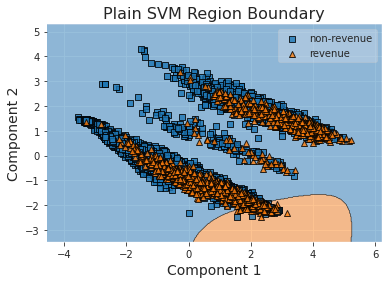

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


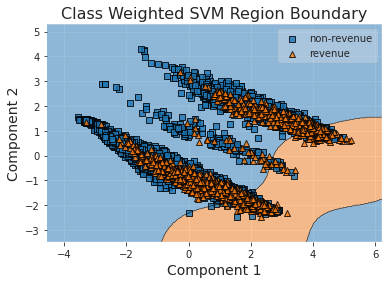

In [ ]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# primero reduciremos las dimensiones a dos con PCA ya que no se pueden visualizar los espacios de alta demiencion.
pca_features = PCA(n_components=2, random_state = 6)
pca_svm_plain_train = pca_features.fit_transform(X_train)


SVM_Plain = SVC(kernel = 'rbf', random_state = 123)
Class_Weighted_SVM= SVC(random_state = 123, class_weight = {0: 0.41, 1: 0.59})#overweighing the positive minority class


SVM_Plain.fit(pca_svm_plain_train,y_train.values.ravel())
Class_Weighted_SVM.fit(pca_svm_plain_train,y_train.values.ravel())



plot = plot_decision_regions(X=pd.DataFrame(pca_svm_plain_train).values, 
                      y=y_train.values.ravel(),
                      clf=SVM_Plain, 
                      legend=2)

plt.xlabel(pd.DataFrame(pca_svm_plain_train).columns[0], size=14)
plt.xlabel('Component 1')
plt.ylabel(pd.DataFrame(pca_svm_plain_train).columns[1], size=14)
plt.ylabel('Component 2')


handles, labels = plot.get_legend_handles_labels()
plot.legend(handles, 
          ['non-revenue', 'revenue'], 
           framealpha=0.3, scatterpoints=1)
plt.title('Plain SVM Region Boundary', size=16)
plt.show()


#trazar region de descision para svm simple
plot2 = plot_decision_regions(X=pd.DataFrame(pca_svm_plain_train).values, 
                      y=y_train.values.ravel(),
                      clf=Class_Weighted_SVM, 
                      legend=2)

# actualice el objeto de la grafica con las etiquetas de los ejes x/y 
plt.xlabel(pd.DataFrame(pca_svm_plain_train).columns[0], size=14)
plt.xlabel('Component 1')
plt.ylabel(pd.DataFrame(pca_svm_plain_train).columns[1], size=14)
plt.ylabel('Component 2')

handles, labels = plot2.get_legend_handles_labels()
plot2.legend(handles, 
          ['non-revenue', 'revenue'], 
           framealpha=0.3, scatterpoints=1)
plt.title('Class Weighted SVM Region Boundary', size=16)
plt.show()


El segundo gráfico nos muestra claramente que el aumento del peso de la clase positiva provocó la expansión de la región amarilla en la que un punto puede clasificarse como ingresos, lo que significa que una SVM sensible a los costes se ocupa del sesgo hacia la clase mayoritaria en un conjunto de datos desequilibrado. .

# Ajuste del umbral de clasificación:
El primer paso para construir sobre nuestros modelos de referencia es optimizar el umbral de clasificación en términos de Fscore y realizar PCA para reducir la dimensionalidad.


# XGboost

In [ ]:
from numpy import arange
from numpy import argmax
import lightgbm as lab
from sklearn.metrics import average_precision_score, precision_recall_curve#
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors()#function to map certain probabilities to classes. Probabilities over a threshold map to 1 and below map to 0

def turn_classes(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')

xgb= XGBClassifier(random_state = 1)
components = [10,11,12,13,14, 15,17,20,25,30,35,40] #almacenar un numero diferente de componentes en una lista
# iterar sobre todo el numero posible de componentes, verificar cual maximiza fbeta, almacenarlo en una variable
#usar el PCA optimo mas tarde
dic_xgb = {}
for number in components:
    pca_features = PCA(n_components=number, random_state = 6)
    xgb_train = pca_features.fit_transform(X_train)
    xgb_test = pca_features.transform(X_test)
    xgb.fit(xgb_train,y_train.values.ravel())
    ypred_train =xgb.predict(xgb_train)
    ypred_test = xgb.predict(xgb_test)
    dic_xgb.update({number : fbeta_score(y_test,ypred_test, beta= 1.2)})
print(dic_xgb)
optimal_xgb_comp = max(dic_xgb, key=dic_xgb.get)  
print('Number of Components that maximize fbeta:' , optimal_xgb_comp)
print()

#numero optimo de componentes
pca_features = PCA(n_components = optimal_xgb_comp, random_state = 123)
xgb_train = pca_features.fit_transform(X_train)
xgb_test = pca_features.transform(X_test)
xgb.fit(xgb_train,y_train.values.ravel())
# iniciar el proceso de ajuste de la probabilidad
prob = xgb.predict_proba(xgb_test)

# probabilidades positivas
probs_test = prob[:,1]


thresholds = arange(0, 1, 0.001)

scores_f1 = [fbeta_score(y_test, turn_classes(probs_test, val), beta= 1.3) for val in thresholds]

opt = argmax(scores_f1)


# hacer predicciones basadas en valores reales y probabilidades previstas
print('Fbeta score = %.3f'% fbeta_score(y_test, turn_classes(probs_test,thresholds[opt]),beta= 1.3))
print('recall = %.3f'% recall_score(y_test, turn_classes(probs_test,thresholds[opt])))
print('precision = %.3f'% precision_score(y_test, turn_classes(probs_test,thresholds[opt])))
#print('roc = %.4f'%  roc_auc_score(y_test, turn_classes(probs_test,thresholds[opt])))
xgb_precision, xgb_recall, xgb_thresholds = precision_recall_curve(y_test, turn_classes(probs_test,thresholds[opt]))
xgb_auc_precision_recall = auc(xgb_recall, xgb_precision)
print('precision-recall auc = %.3f'% xgb_auc_precision_recall)



{10: 0.6921331316187593, 11: 0.690268347882315, 12: 0.6911994820050721, 13: 0.6916917454858127, 14: 0.6930693069306931, 15: 0.6864686468646866, 17: 0.6804073714839961, 20: 0.6879080559002859, 25: 0.6959048592799871, 30: 0.6982480653482372, 35: 0.7043651864242163, 40: 0.6982585580209407}
Number of Components that maximize fbeta: 35

Fbeta score = 0.730
recall = 0.756
precision = 0.691
precision-recall auc = 0.742


Realice una búsqueda aleatoria para la optimización de hiperparámetros en el algoritmo XGboost. Los métodos de conjunto como XGboost son computacionalmente costosos y Gridsearch consumiría mucho tiempo. Los parámetros inicializados en param grid son valores que se encontraron arriba como posibles valores de alto rendimiento a través del ajuste manual/prueba y error arriba.

In [ ]:
from scipy.stats import randint as randint
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

xgb = XGBClassifier()
fbeta = make_scorer(fbeta_score, beta=1.3)
#crear diccionario de  grid 
param_grid = {'scale_pos_weight': [1.7,1.8, 1.9],
             'min_child_weight': [ 1.06, 1.46],
             'n_estimators': [106,116, 126,136],}

cv = StratifiedKFold(n_splits=5)
rsearch = RandomizedSearchCV(estimator= xgb, 
                          param_distributions= param_grid,#
                          cv=cv, 
                             
                          n_jobs=-1,n_iter=10, 
                          scoring=fbeta, 
                          verbose=2).fit(xgb_train, y_train.values.ravel())
print(rsearch.best_params_)
# almacenar los parametros optimizados en el clasificador xGboost


Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'scale_pos_weight': 1.9, 'n_estimators': 106, 'min_child_weight': 1.06}


###  Ajuste del XGboost sintonizado al modelo de tren y generación de predicciones

In [ ]:
###### fit the optimized classifier to the releveant training set
#'scale_pos_weight': 2.25, 'n_estimators': 115, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0.1}
#xgb = XGBClassifier( n_estimators=136,scale_pos_weight = 1.9,min_child_weight = 1.46, random_state=1)
xgb=XGBClassifier(**rsearch.best_params_,random_state=1)
xgb.fit(xgb_train,y_train.values.ravel())
prob = xgb.predict_proba(xgb_test)
# keep probabilities for the positive outcome only
probs_xgb = prob[:,1]
# create possible thresholds
thresholds = arange(0, 1, 0.001)
# evaluate each threshold
scores_f1 = [fbeta_score(y_test, turn_classes(probs_xgb, val), beta= 1.3) for val in thresholds]
# extract optimal thresh
opt_xgb = argmax(scores_f1)
#y_pred = turn_classes(probs_test,thresholds[opt])

print('Results for threshold tuned XGboost:')
print()
thres_tuned_xgb_fb =  '%.3f'%fbeta_score(y_test, turn_classes(probs_xgb,thresholds[opt_xgb]),beta= 1.3)
print('fbeta:' , thres_tuned_xgb_fb)
thres_tuned_xgb_rec =  '%.3f'%recall_score(y_test, turn_classes(probs_xgb,thresholds[opt_xgb])).round(2)
print('recall :', thres_tuned_xgb_rec)
thres_tuned_xgb_prec =  '%.3f'% precision_score(y_test, turn_classes(probs_xgb,thresholds[opt_xgb])).round(2)
print('precision :', thres_tuned_xgb_prec)
xgb_precision, xgb_recall, xgb_thresholds = precision_recall_curve(y_test, turn_classes(probs_xgb,thresholds[opt_xgb]))
tuned_xgb_pr_auc = '%.3f'%auc(xgb_recall, xgb_precision).round(2)
print('precision-recall auc :' ,tuned_xgb_pr_auc)

Results for threshold tuned XGboost:

fbeta: 0.732
recall : 0.760
precision : 0.690
precision-recall auc : 0.740


La optimización de los hiperparámetros y, principalmente, el ajuste del umbral de clasificación dieron como resultado un aumento significativo del rendimiento del clasificador XGboost. Los remedios anteriores mejoraron el recuerdo de 0,63 a 0,79 (fbeta aumentó en 0,08) y mejoraron la capacidad de nuestro clasificador para identificar los verdaderos positivos, lo cual es muy importante para una empresa que quiere identificar compradores potenciales.

# Regresión logística

In [ ]:
lr = LogisticRegression(random_state = 123)

#Determine the optiimal number of compnenets that maximizes fbeta
components =[10,11,12,13,14,15,20,25,30,35,40]
dic_lr = {}
for number in components:
    pca_features = PCA(n_components=number)
    lr_train = pca_features.fit_transform(X_train)
    lr_test = pca_features.transform(X_test)
    lr.fit(lr_train,y_train.values.ravel())
    ypred_train =lr.predict(lr_train)
    ypred_test = lr.predict(lr_test)
    dic_lr.update({number : '%.4f' % fbeta_score(y_test,ypred_test, beta=1.3)})
print(dic_lr)
optimal_lr_comp = max(dic_lr, key=dic_lr.get)  
print('The number of components that optimizes Fbeta is:', optimal_lr_comp)
lr = LogisticRegression(random_state = 123)
print()
#implement svm algorithm with optimalnumber of components #
pca_features = PCA(n_components=optimal_lr_comp, random_state = 123)
lr_train = pca_features.fit_transform(X_train)
lr_test = pca_features.transform(X_test)
lr.fit(lr_train,y_train.values.ravel())

# predict probabilities
prob = lr.predict_proba(lr_test)
# keep probabilities for the positive outcome only
probs_test = prob[:,1]
# create possible thresholds
thresholds = arange(0, 1, 0.001)
# evaluate each threshold
scores_f1 = [fbeta_score(y_test, turn_classes(probs_test, val), beta=1.3) for val in thresholds]
# extract optimal thresh
opt = argmax(scores_f1)
print('Logistic Regression results:')
print()
print('F1 score = %.4f'% fbeta_score(y_test, turn_classes(probs_test,thresholds[opt]),beta= 1.3))
print('recall = %.4f'% recall_score(y_test, turn_classes(probs_test,thresholds[opt])))
print('precision = %.4f'% precision_score(y_test, turn_classes(probs_test,thresholds[opt])))
lr_precision, lr_recall, lr_thresholds = precision_recall_curve(y_test, turn_classes(probs_test,thresholds[opt]))
lr_auc_precision_recall = auc(lr_recall, lr_precision)
print('precision-recall auc = %.4f'% lr_auc_precision_recall)


{10: '0.7121', 11: '0.7098', 12: '0.7121', 13: '0.7083', 14: '0.6952', 15: '0.6975', 20: '0.6883', 25: '0.6698', 30: '0.6818', 35: '0.6771', 40: '0.6714'}
The number of components that optimizes Fbeta is: 10

Logistic Regression results:

F1 score = 0.7406
recall = 0.7683
precision = 0.6981
precision-recall auc = 0.7511


## Optimizacion los hiperparámetros de la regresión logística y ajuste el algoritmo optimizado


In [ ]:
from sklearn.model_selection import GridSearchCV
lr = LogisticRegression(random_state=123)
params = {'solver': ['liblinear'],
        'penalty' : [ 'l2', 'l1'],
          'C':[0.1,0.3,0.5,0.8,1,1.5,2,2.5,3,4,5]}
rand = RandomizedSearchCV(lr, param_distributions = params,cv=10,scoring = fbeta).fit(lr_train, y_train.values.ravel())
print('Optimal parameters:', rand.best_params_)

#store the optimized parameters in the Logisti Rgression classifier
lr=LogisticRegression(**rand.best_params_)

#lr=LogisticRegression(C = 2,random_state=123)
#Fit the optimized claasifier to the relevant training set
lr.fit(lr_train,y_train.values.ravel())

# predict probabilities
prob = lr.predict_proba(lr_test)
# keep probabilities for the positive outcome only
probs_lr = prob[:,1]
# create possible thresholds
thresholds = arange(0, 1, 0.001)
# evaluate each threshold
scores_f1 = [fbeta_score(y_test, turn_classes(probs_lr, val), beta=1.3) for val in thresholds]
# extract optimal thresh
opt_lr = argmax(scores_f1)
print('Results for threshold tuned Logistic Regression:')
print()
thres_tuned_lr_fb =  '%.3f'%fbeta_score(y_test, turn_classes(probs_lr,thresholds[opt_lr]),beta= 1.3).round(2)
print('fbeta:' , thres_tuned_lr_fb)
thres_tuned_lr_rec =  '%.3f'%recall_score(y_test, turn_classes(probs_lr,thresholds[opt_lr])).round(2)
print('recall :', thres_tuned_lr_rec)
thres_tuned_lr_prec =  '%.3f'% precision_score(y_test, turn_classes(probs_lr,thresholds[opt_lr])).round(2)
print('precision :', thres_tuned_lr_prec)
lr_precision, lr_recall, lr_thresholds = precision_recall_curve(y_test, turn_classes(probs_lr,thresholds[opt_lr]))
tuned_lr_pr_auc = '%.3f'%auc(lr_recall, lr_precision).round(2)
print('precision-recall auc :' ,tuned_lr_pr_auc)

Optimal parameters: {'solver': 'liblinear', 'penalty': 'l2', 'C': 2}
Results for threshold tuned Logistic Regression:

fbeta: 0.740
recall : 0.770
precision : 0.700
precision-recall auc : 0.750


Una vez más, el ajuste del umbral y la optimización de los hiperparámetros dieron como resultado un mejor rendimiento para nuestro modelo de regresión logística. Específicamente, el Fscore mejoró en .05 mientras que el recuerdo aumentó de .63 a .76. Sin embargo, la compensación entre recuperación y precisión provocó una ligera caída en la precisión del modelo de 0,74 a 0,70. Esto significa que el modelo identifica de manera más eficiente a los verdaderos compradores, sin embargo, también clasifica a más no compradores como compradores. Esto no es tan problemático en nuestro caso, ya que el costo de perder a un comprador es más alto que el costo de clasificar erróneamente a un no comprador como comprador.

In [ ]:
from sklearn.metrics import accuracy_score

#Determine the optiimal number of compnenets that maximizes fbeta
#Store component numbers in a list and iterate through them to check which number
#yields the best Fbeta
components = [10,11,12,13,15,20,25,30,35]
svc = SVC(random_state = 123, probability=True)
dic_svm = {}
for number in components:
    pca_features = PCA(n_components=number, random_state = 123)
    svm_train = pca_features.fit_transform(X_train)
    svm_test = pca_features.transform(X_test)
    svc.fit(svm_train,y_train.values.ravel())
    ypred_train =svc.predict(svm_train)
    ypred_test = svc.predict(svm_test)
    dic_svm.update({number : fbeta_score(y_test,ypred_test, beta= 1.3)})
print(dic_svm)
#extract the number off compnents that yields the best performance
optimal_svm_comp = max(dic_svm, key=dic_svm.get)  
print('Optimal components for SVM:', optimal_svm_comp)

#implement svm algorithm with optimal number of components 

svc = SVC(random_state = 123, probability=True, class_weight = {0: 0.41, 1: 0.59})
pca_features = PCA(n_components=optimal_svm_comp)
#Method 1, train classifier within CCCV
pca_features = PCA(n_components=optimal_svm_comp)
svm_train = pca_features.fit_transform(X_train)
svm_test = pca_features.transform(X_test)
svc.fit(svm_train,y_train.values.ravel())

# predict probabilities
yhat = svc.predict_proba(svm_test)
# keep probabilities for the positive outcome only
probs_test = yhat[:, 1]
# define thresholds
thresholds = arange(0, 1, 0.001)
# evaluate each threshold
scores = [fbeta_score(y_test, turn_classes(probs_test, t), beta= 1.3) for t in thresholds]
# get best threshold
ix = argmax(scores)
print()
print('Class-Weighted SVM results:')
print()
print('Accuracy score = %.4f'% accuracy_score(y_test, turn_classes(probs_test,thresholds[ix])))
print('Fbeta score = %.4f'% fbeta_score(y_test, turn_classes(probs_test,thresholds[ix]),beta= 1.3))
print('recall = %.4f'% recall_score(y_test, turn_classes(probs_test,thresholds[ix])))
print('precision = %.4f'% precision_score(y_test, turn_classes(probs_test,thresholds[ix])))
lr_precision, lr_recall, lr_thresholds = precision_recall_curve(y_test, turn_classes(probs_test,thresholds[ix]))
lr_auc_precision_recall = auc(lr_recall, lr_precision)
print('precision-recall auc = %.4f'% lr_auc_precision_recall)

{10: 0.7094616869966561, 11: 0.7024411570091693, 12: 0.7024411570091693, 13: 0.6970237246232112, 15: 0.6985604515486411, 20: 0.6963092852371411, 25: 0.6946520373191166, 30: 0.6938263680882423, 35: 0.6954796740218272}
Optimal components for SVM: 10

Class-Weighted SVM results:

Accuracy score = 0.9081
Fbeta score = 0.7404
recall = 0.7866
precision = 0.6736
precision-recall auc = 0.7466


Optimice los parámetros SVM ponderados. SVM también es costoso desde el punto de vista computacional y elegimos la búsqueda aleatoria en lugar de la búsqueda extensa en cuadrícula

In [ ]:
from scipy.stats import randint as randint
from scipy.stats import uniform as uniform 


svc = SVC(random_state = 123,  class_weight = {0: 0.41, 1: 0.59}, probability = True)
#initialize  C parametetr values for search
params =  {'C': [1,1.2,1.5,2],
           }
          
# perform  search 
rand = RandomizedSearchCV(svc, param_distributions = params,cv=3, n_jobs=2,scoring = fbeta).fit(svm_train, y_train.values.ravel())
print('Optimal parameters:', rand.best_params_)

svc=SVC(**rand.best_params_,random_state=123, class_weight = {0: 0.42, 1: 0.58}, probability = True)

#svc= SVC(C=1,random_state=123,  class_weight = {0: 0.42, 1: 0.58}, probability = True)
svc.fit(svm_train,y_train.values.ravel())
# predict probabilities
yhat = svc.predict_proba(svm_test)
# keep probabilities for the positive outcome only
probs_svm = yhat[:, 1]
# define thresholds
thresholds = arange(0, 1, 0.001)
# evaluate each threshold
scores = [fbeta_score(y_test, turn_classes(probs_svm, t), beta= 1.3) for t in thresholds]
# get best threshold
ix_svm = argmax(scores)
print('Results for threshold tuned SVM:')
print()
thres_tuned_svm_fb =  '%.3f'%fbeta_score(y_test, turn_classes(probs_svm,thresholds[ix_svm]),beta= 1.3).round(2)
print('fbeta:' , thres_tuned_svm_fb)
thres_tuned_svm_rec =  '%.3f'%recall_score(y_test, turn_classes(probs_svm,thresholds[ix_svm])).round(2)
print('recall :', thres_tuned_svm_rec)
thres_tuned_svm_prec =  '%.3f'% precision_score(y_test, turn_classes(probs_svm,thresholds[ix_svm])).round(2)
print('precision :', thres_tuned_svm_prec)
svm_precision, svm_recall, svm_thresholds = precision_recall_curve(y_test, turn_classes(probs_svm,thresholds[ix_svm]))
tuned_svm_pr_auc = '%.3f'%auc(svm_recall, svm_precision).round(2)
print('precision-recall auc :' ,tuned_svm_pr_auc)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Optimal parameters: {'C': 1}
Results for threshold tuned SVM:

fbeta: 0.740
recall : 0.790
precision : 0.670
precision-recall auc : 0.750


Cambiar el umbral y realizar PCA resultó en diferencias marginales para nuestra máquina de vector de soporte ponderada de clase en comparación con nuestra SVM base. Solo precisión elevada por .02 iaumentando la capacidad de nuestro modelo para clasificar correctamente la clase negativa

##Resumen de los resultados hasta el momento:

In [ ]:
# df with the scores from the base models
df_scores=pd.DataFrame({'Model': ['Base XGboost', 'Base Linear Regression', 'Base Weighted SVM'], 
                'Recall' : [base_xgb_recall, base_lr_recall ,base_svm_recall],
                'Precision' : [base_xgb_prec,base_lr_prec ,base_svm_prec],
                'Fbeta' : [base_xgb_Fbeta, base_lr_Fbeta ,base_svm_Fbeta],
                'PR AUC score' : [base_xgb_auc_pr, base_lr_auc_pr,base_svm_auc_pr]})
                
# second dg with the scores of the threshold tuned models
df2_scores=pd.DataFrame({'Model': ['Threshold Tuned XGboost/PCA', 'Threshold Tuned Linear Regression/PCA', 'Threshold Tuned Weighted SVM/PCA'], 
                'Recall' : [thres_tuned_xgb_rec, thres_tuned_lr_rec ,thres_tuned_svm_rec],
                'Precision' : [thres_tuned_xgb_prec,thres_tuned_lr_prec ,thres_tuned_svm_prec],
                'Fbeta' : [thres_tuned_xgb_fb, thres_tuned_lr_fb ,thres_tuned_svm_fb],
                'PR AUC score' : [tuned_xgb_pr_auc, tuned_lr_pr_auc,tuned_svm_pr_auc]})
df_scores = df_scores.append(df2_scores)
df_scores

,Model,Recall,Precision,Fbeta,PR AUC score
0,Base XGboost,0.630,0.780,0.680,0.730
1,Base Linear Regression,0.640,0.740,0.670,0.720
2,Base Weighted SVM,0.770,0.700,0.740,0.750
0,Threshold Tuned XGboost/PCA,0.760,0.690,0.732,0.740
1,Threshold Tuned Linear Regression/PCA,0.770,0.700,0.740,0.750
2,Threshold Tuned Weighted SVM/PCA,0.790,0.670,0.740,0.750


### Matrices de confusión para cada uno de nuestros clasificadores después del ajuste de umbral:

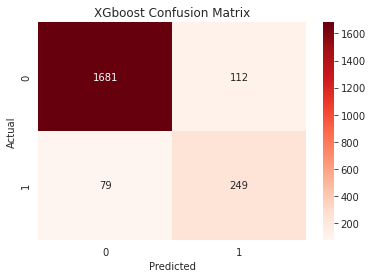

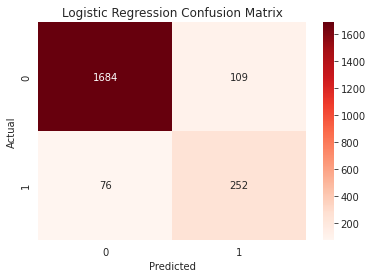

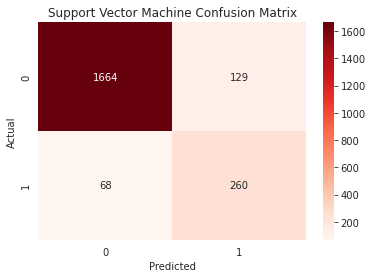

In [ ]:

import seaborn as sn
import matplotlib.pyplot as plt

# Visualize the 3 clasisfiers performance with confusion matrices
dic_train = {xgb : xgb_train, lr: lr_train, svc:svm_train}
dic_test = {xgb : xgb_test, lr: lr_test, svc:svm_test}
for model in [xgb, lr, svc]:
        predictions_xgb = pd.DataFrame(turn_classes(probs_xgb,thresholds[opt_xgb]))
        predictions_lr = pd.DataFrame(turn_classes(probs_lr,thresholds[opt_lr]))
        predictions_svm = pd.DataFrame(turn_classes(probs_svm,thresholds[ix_svm]))
        turn_classes(probs_svm,thresholds[ix_svm])
        if model == xgb:
            df =  pd.concat([y_test.reset_index(drop=True),predictions_xgb.reset_index(drop=True)], axis=1, )
            df['Actual'] = df.iloc[:,0] 
            df['Predicted'] = df.iloc[:,1] 
            df =  pd.concat([df['Actual'].reset_index(drop=True),df['Predicted'].reset_index(drop=True)], axis=1, )
            confusion_matrix = pd.crosstab(df['Actual'], df['Predicted'], rownames=['Actual'], colnames=['Predicted'])
            ax = plt.axes()
            sns.heatmap(confusion_matrix, annot=True,fmt='g', cmap='Reds')
            ax.set_title('XGboost Confusion Matrix')
            plt.show()
        elif model == lr:
            df =  pd.concat([y_test.reset_index(drop=True),predictions_lr.reset_index(drop=True)], axis=1, )
            df['Actual'] = df.iloc[:,0] 
            df['Predicted'] = df.iloc[:,1] 
            df =  pd.concat([df['Actual'].reset_index(drop=True),df['Predicted'].reset_index(drop=True)], axis=1, )
            confusion_matrix = pd.crosstab(df['Actual'], df['Predicted'], rownames=['Actual'], colnames=['Predicted'])
            ax = plt.axes()
            sns.heatmap(confusion_matrix, annot=True,fmt='g', cmap='Reds')
            ax.set_title('Logistic Regression Confusion Matrix')
            plt.show()
        else:
            df =  pd.concat([y_test.reset_index(drop=True),predictions_svm.reset_index(drop=True)], axis=1, )
            df['Actual'] = df.iloc[:,0] 
            df['Predicted'] = df.iloc[:,1] 
            df =  pd.concat([df['Actual'].reset_index(drop=True),df['Predicted'].reset_index(drop=True)], axis=1, )
            confusion_matrix = pd.crosstab(df['Actual'], df['Predicted'], rownames=['Actual'], colnames=['Predicted'])
            ax = plt.axes()
            sns.heatmap(confusion_matrix, annot=True,fmt='g', cmap='Reds')
            ax.set_title('Support Vector Machine Confusion Matrix')
            plt.show()
    

        

### Área de recuperación de precisión bajo la curva (PR-AUC) para nuestros algoritmos

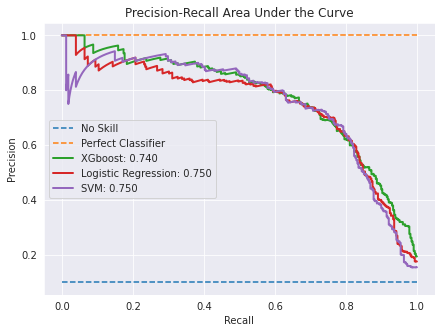

In [ ]:
from matplotlib import pyplot
from sklearn.dummy import DummyClassifier


probs_xgb = xgb.predict_proba(xgb_test)
probs_xgb = probs_xgb[:, 1]

probs_lr = lr.predict_proba(lr_test)
probs_lr = probs_lr[:, 1]

probs_svc = svc.predict_proba(svm_test)
probs_svc = probs_svc[:, 1]

xgb_precision, xgb_recall, _ = precision_recall_curve(y_test, probs_xgb)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, probs_lr)
svc_precision, svc_recall, _ = precision_recall_curve(y_test, probs_svc)

fig, ax = plt.subplots(figsize=(7,5))
ax.set_title('Precision-Recall Area Under the Curve')

# plot the precision-recall curves
#no_skill = len(y_test[y_test==1]) / len(y_test)
ax.plot([0, 1], [0.1 , 0.1], linestyle='--', label='No Skill')
ax.plot([0, 1], [1 , 1], linestyle='--', label='Perfect Classifier')

pyplot.plot(xgb_recall, xgb_precision, label='XGboost:'+ ' '+ tuned_xgb_pr_auc , linewidth=2)
pyplot.plot(lr_recall, lr_precision, label='Logistic Regression:'+ ' '+ tuned_lr_pr_auc, linewidth=2)
pyplot.plot(svc_recall, svc_precision , label='SVM:' + ' '+ tuned_svm_pr_auc, linewidth=2)


# axis labels
pyplot.xlabel('Recall')
#pyplot.setp(leg_lines, linewidth=4)
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
ax.legend(loc='center left');
# show the plot
pyplot.show()

Primero, implementaremos una serie de técnicas de sobremuestreo y submuestreo y probaremos cuál maximiza la puntuación fbeta para cada uno de los algoritmos.

## Resumen del rendimiento de los modelos:

In [ ]:
df_scores

,Model,Recall,Precision,Fbeta,PR AUC score
0,Base XGboost,0.630,0.780,0.680,0.730
1,Base Linear Regression,0.640,0.740,0.670,0.720
2,Base Weighted SVM,0.770,0.700,0.740,0.750
0,Threshold Tuned XGboost/PCA,0.760,0.690,0.732,0.740
1,Threshold Tuned Linear Regression/PCA,0.770,0.700,0.740,0.750
2,Threshold Tuned Weighted SVM/PCA,0.790,0.670,0.740,0.750


# Discusión de resultados:


En general, las técnicas de ajuste de umbral y remuestreo mejoraron significativamente el rendimiento de nuestros modelos en comparación con los algoritmos de referencia. La variación de los 6 modelos en términos de puntuación f1 ponderada fue muy baja (0,73-0,75) y el modelo XGboost seguido de ajuste de umbral generó las predicciones más precisas en general (F1 = 0,751).

Sin embargo, la elección de un modelo para la producción potencial dependería completamente del objetivo de la empresa, ya que cada algoritmo logra diferentes objetivos. Específicamente, si la empresa se enfoca tanto en identificar a los verdaderos clientes de ingresos como ingresos (alto recuerdo) como en minimizar las sesiones sin ingresos clasificadas incorrectamente como ingresos (alta precisión), entonces el ajuste del umbral con XGboost brindaría las predicciones más precisas a medida que logra un equilibrio entre los dos objetivos. Por otro lado, si el objetivo de la empresa es también evitar el gasto innecesario de anuncios u otros planes estratégicos dirigidos a más personas de las necesarias, es decir, deben minimizar los falsos positivos (no compradores clasificados como compradores (alta precisión), mientras manteniendo un recuerdo justo,